# Python Image Processing #
(c) Numerical Factory (2025)

To work with images, we must have the files accessible.

#### Load image files

We can load images directly into the workspace using the sidebar:

`Files > upload files`

This is simple, but when you log out these will disappear.



### What is a Digital Image?

An image is nothing more than **a matrix of numerical data** that you need to know how to interpret. Digital images can be in color, called RGB, or in grayscale.

Each element of an image is called **pixel** and in the case of being in color, it contains 3 integer values ​​between 0 and 255 (uint8). In the case that a pixel contains only a single value, the image is seen in grayscale.

<div>
<img src="https://numfactory.upc.edu/web/images/OnePixel1.png" width="400"/>
</div>

Valors guardats en cada pixel:

<div>
<img src="https://numfactory.upc.edu/web/images/OnePixel2.png" width="500"/>
</div>

How an image is formed from colors:

<div>
<img src="https://numfactory.upc.edu/web/images/OnePixel3.png" width="500"/>
</div>



The process of loading an image has the following steps:
- Load the library: **import matplotlib.pyplot as plt**
- Read an image: **plt.imread** (must be in the working directory or give the path to find it)
- Show the image: **plt.imshow**








# Color Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# read the image: it can be in color or grayscale
img = plt.imread('mandrill.jpg')
height, width, channels = img.shape # we look at its size
print ([height, width, channels])
plt.imshow(img); # we show the image (we put ; at the end to avoid the information text)


# Grayscale Images

In [ ]:
# A grayscale image
imgGray = plt.imread('coins.jpg') #if we do not set this option, the image will have 3 equal channels

height, width  = imgGray.shape # let's look at its size
print ([height, width ])
# show the image

plt.imshow(imgGray, cmap=plt.get_cmap('gray'));


In [ ]:
imgGray.shape

In [ ]:
imOrig = imgGray.copy()  # making a direct assignment is NOT a permanent copy
#change the values ​​of a pixel
print(imOrig[50,20])
imOrig[50,20] = 255 #we assign white to pixel (50,20)
print(imOrig[50,20])

In [ ]:
imOrig[80:150,100:160] = 255 #we insert a white rectangle in the middle of the image
plt.imshow(imOrig, cmap=plt.get_cmap('gray')); 

### Example: ###
We will load this image (greens.jpg) and try to erase the red balls.

<div>
<img src="https://numfactory.upc.edu/web/images/greens.jpg" width="600"/>
</div>




In [ ]:
img = plt.imread('greens.jpg')
height, width, channels = img.shape # let's look at its size
print ([height, width, channels])
imgNew=img.copy()
# we go through all the pixels and those that have the R channel greater than 180 we set them to 0
for i in range(1,height):
    for j in range(1,width):
        if (imgNew[i,j,0] > 180):
            imgNew[i,j,0] = 0


plt.imshow(imgNew); # we see the result (which is not very satisfactory)


In [ ]:
# As you can see the reds are still there and the pure whites have been lost
# this happens because the white pixels also have a very high R channel
# let's do it better:

img = plt.imread('greens.jpg')
height, width, channels = img.shape # let's look at its size
imgNew=img.copy()
# we go through all the pixels again
for i in range(1,height):
    for j in range(1,width):
        if (imgNew[i,j,0] > 150 & imgNew[i,j,1] < 120 & imgNew[i,j,2] < 120 ):
            imgNew[i,j,0] = 0


plt.imshow(imgNew); # we see that we have recovered the whites and many reds disappear

In [ ]:
img = plt.imread('mandrill.jpg')
height, width, channels = img.shape # let's look at its size
imgNew=img.copy()
imgNew[:,:,1] = 0
imgNew[:,:,0] = 0


#plt.imshow(imred,cmap=plt.get_cmap('gray'));
plt.imshow(imgNew);

# Image Derivative: Contour Detection #


In [ ]:
# The derivative can be done for each channel. We will do it for the grayscale image.
img = plt.imread('coins.jpg') 
height, width  = img.shape 
img = img/255.0 #convert int8 to floats

plt.imshow(img,cmap=plt.get_cmap('gray')); # colormap for gray images

print ([height, width ])
Dh = np.zeros((height, width))
Dv = np.zeros((height, width))
# we go through all the pixels calculating the differences between neighbors
for i in range(1,height-1):
    for j in range(1,width-1):
        Dh[i,j] = np.abs((img[i,j+1]-img[i,j-1]))/2 #we calculate the derivative in absolute value
        if ( Dh[i,j] < 0.01): #optional: just to contrast backgrond
            Dh[i,j] = 0
        Dv[i,j] = np.abs((img[i+1,j]-img[i-1,j]))/2
        if ( Dv[i,j] < 0.01):
            Dv[i,j] = 0


# we show the image of the contours: horizontal direction
plt.imshow(Dh,cmap=plt.get_cmap('gray'));

In [ ]:
# we show the image of the contours: vertical direction
plt.imshow(Dv,cmap=plt.get_cmap('gray'));

In [ ]:
# we show the image of the contours: adding both direction (best using the gradient)
plt.imshow(Dh+Dv,cmap=plt.get_cmap('gray'));

### Exercise

Feu el mateix amb la imatge **BB8small.jpg**

<div>
<img src="https://numfactory.upc.edu/web/images/BB8.jpg" width="400"/>
</div>




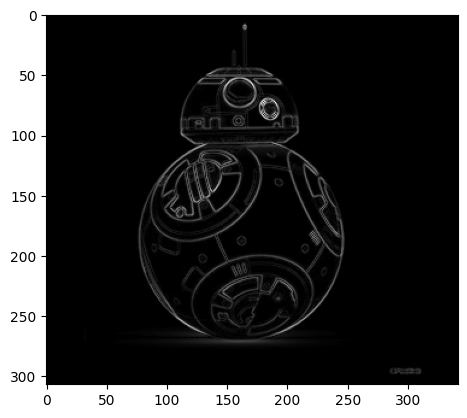

In [ ]:
# Do the same with this new image
# .......